# Extending the Classic SIR Model with Small-Scale Vaccination

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# 0th order, nondimensionalized 
def sir_O(y, t, R0):
    s, i, r = y
    dsdt = -R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    return [dsdt, didt, drdt]

# first order correction
def sir_1(y, t, s0_sol, i0_sol, r0_sol, R0, t_vals):
    s1, i1, r1 = y
    s0 = np.interp(t, t_vals, s0_sol)
    i0 = np.interp(t, t_vals, i0_sol)
    ds1dt = -R0 * (s1 * i0 + s0 * i1) - s0
    di1dt = R0 * (s1 * i0 + s0 * i1) - i1
    dr1dt = i1 + s0
    return [ds1dt, di1dt, dr1dt]

In [10]:
# INITIAL CONDITIONS
R0 = 2.5  # basic reproduction number
epsilon = 0.01  #  vaccination rate (dimensionless)
# t = np.linspace(0, 160, 1000)
t = np.linspace(0, 160, num=160) 

s0 = 0.99
i0 = 0.01
r0 = 0.0
y0 = [s0, i0, r0]

# INIT CONDS FOR FIRST-ORDER
y1_init = [0.0, 0.0, 0.0]

In [11]:
# ZEROTH ORDER CORRECTION
sol_0 = odeint(sir_O, y0, t, args=(R0,))
s0_sol, i0_sol, r0_sol = sol_0.T

# FIRST ORDER CORRECTION
sol_1 = odeint(sir_1, y1_init, t, args=(s0_sol, i0_sol, r0_sol, R0, t))
s1_sol, i1_sol, r1_sol = sol_1.T

# First-order approx (full sol)
s_total = s0_sol + epsilon * s1_sol
i_total = i0_sol + epsilon * i1_sol
r_total = r0_sol + epsilon * r1_sol

Plot saved


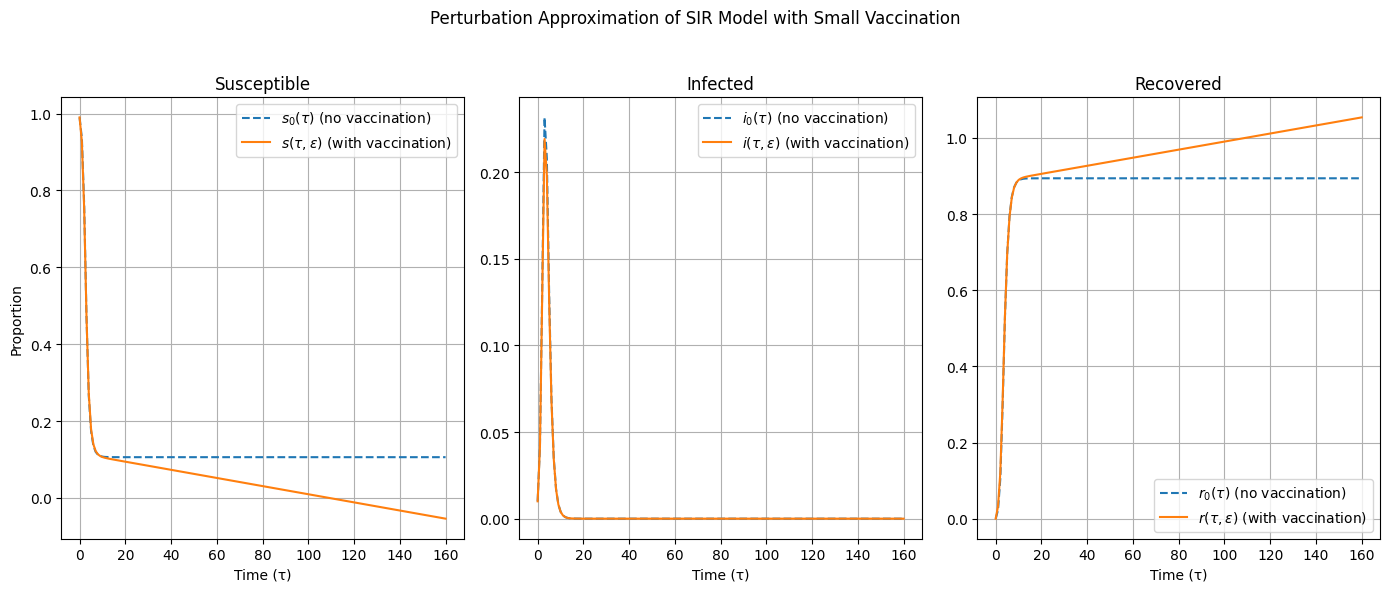

In [15]:
# PLOTTING RESULTS
plt.figure(figsize=(14, 6))

# Subplot for S
plt.subplot(1, 3, 1)
plt.plot(t, s0_sol, label="$s_0(\\tau)$ (no vaccination)", linestyle='--')
plt.plot(t, s_total, label="$s(\\tau, \\epsilon)$ (with vaccination)")
plt.title("Susceptible")
plt.xlabel("Time (τ)")
plt.ylabel("Proportion")
plt.legend()
plt.grid(True)

# Subplot for I
plt.subplot(1, 3, 2)
plt.plot(t, i0_sol, label="$i_0(\\tau)$ (no vaccination)", linestyle='--')
plt.plot(t, i_total, label="$i(\\tau, \\epsilon)$ (with vaccination)")
plt.title("Infected")
plt.xlabel("Time (τ)")
plt.legend()
plt.grid(True)

# Subplot for R
plt.subplot(1, 3, 3)
plt.plot(t, r0_sol, label="$r_0(\\tau)$ (no vaccination)", linestyle='--')
plt.plot(t, r_total, label="$r(\\tau, \\epsilon)$ (with vaccination)")
plt.title("Recovered")
plt.xlabel("Time (τ)")
plt.legend()
plt.grid(True)

plt.suptitle("Perturbation Approximation of SIR Model with Small Vaccination")
plt.tight_layout(rect=[0, 0, 1, 0.95])

# save plot 
filename = 'vaccine'
full_path = f'C:/Users/leena/math111a/plots/{filename}.png'

plt.savefig(full_path)
print('Plot saved')

plt.show()